# 평가 

### 분류모델 평가 

In [14]:
# 타이타닉 전처리 함수 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df


def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]    # Cabin 데이터의 앞 글자만 가져옴

    categories = ['Sex', 'Cabin', 'Embarked']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df


def preprocess_data(df):
    """
    전처리 함수 호출
    """
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df


def scailing_feature(train_data, test_data):
    """
    특성 스케일링 (정규화)
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    return train_scaled, test_scaled

##### 정확도 (Accuracy score)

- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [15]:
# 잘못 학습된 모델 만들어보기
from sklearn.base import BaseEstimator
import numpy as np 

# 성별로만 판별하는 모델 작성 
class MyTitanicClassifier(BaseEstimator):

    # 훈련 메서드
    def fit(self, X, y) : 
        pass

    # 결과 예측 메서드
    def predict(self, X) :
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]     # = 해석해봐바.,.
            if sex == 0 :                 # 여성이면
                pred[i] = 1               # 생존이라 예측하도록 만듦
        return pred 

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split

# 데이터 로드 
df = pd.read_csv('./data/titanic.csv')

# 데이터 분리 
X = df.drop('Survived', axis=1)
y = df['Survived']

X = preprocess_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score

# 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 정확도로 평가 (accuracy_score)
print(f'훈련 데이터 정확도 : {accuracy_score(y_train, pred_train)}')    
print(f'평가 데이터 정확도 : {accuracy_score(y_test, pred_test)}')

# 훈련 데이터 정확도 : 0.7889221556886228    # 잘못된 모델로 평가 했는데 78점이 나온것으로 봐서 평가지표로 사용하기엔 좋지 않다는 것을 알 수 있음. (그저 여자 수가 많은 것)
# 평가 데이터 정확도 : 0.7802690582959642

훈련 데이터 정확도 : 0.7889221556886228
평가 데이터 정확도 : 0.7802690582959642


##### 혼동행렬 (confusion matrix)

깃에 사진 확인

In [ ]:
# 다중으로 그리는 방법 코드 (깃)

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

- 정밀도 (Precision)
    - 양성이라고 예측한 것 (TP + FP) 중에 실제 양성(TP)일 확률
    - 정밀도가 중요한 지표인 경우 : 음성인 데이터를 양성으로 예측하면 안되는 경우 (스팸메일 분류 등)

In [20]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]])

In [22]:
p_score = 59 / (59 + 24)   # tp / (tp + fp)
p_score, precision_score(y_test, pred_test)

(0.7108433734939759, 0.7108433734939759)

- 재현율 (Recall)
    - 실제 양성 (TP + FN) 중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우 : 양성인 데이터를 음성으로 예측하면 안되는 경우 (암 진단, 보험/금융 사기 탐지 등)

In [23]:
recall_score(y_test, pred_test)

0.7023809523809523

In [28]:
def evaluate_binary_classification(y_true, y_pred) :
    print('혼동행렬: ')
    print(confusion_matrix(y_true, y_pred))
    print(f'정확도 : {accuracy_score(y_true, y_pred)}, 정밀도 : {precision_score(y_true, y_pred)}, 재현율 : {recall_score(y_true, y_pred)}')

In [29]:
class MyDeathClassifier(BaseEstimator) : 
    def fit(self, X, y):
        pass

    def predict(self, X) :
        return np.zeros((X.shape[0], 1))   # 전부 사망
    
my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬: 
[[410   0]
 [258   0]]
정확도 : 0.6137724550898204, 정밀도 : 0.0, 재현율 : 0.0
혼동행렬: 
[[139   0]
 [ 84   0]]
정확도 : 0.6233183856502242, 정밀도 : 0.0, 재현율 : 0.0


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# 제대로 된 모델 사용
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)

evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)           # 정확도, 정밀도, 재현율 다 다른 모델일 때와 변화

혼동행렬: 
[[350  60]
 [ 77 181]]
정확도 : 0.7949101796407185, 정밀도 : 0.7510373443983402, 재현율 : 0.7015503875968992
혼동행렬: 
[[117  22]
 [ 23  61]]
정확도 : 0.7982062780269058, 정밀도 : 0.7349397590361446, 재현율 : 0.7261904761904762


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도와 재현율의 trade-off (상충관계를 가짐)
    - 분류 결정 임계치(threshold)를 낮추면? positive로 예측할 확률이 높아진다.
        - 정밀도는 낮아지고, 재현율은 높아진다.
    - 분류 결정 임계치(threshold)를 높이면? positive로 예측할 확률이 낮아진다.  (사진 확인 ;;)
        - 정밀도는 높아지고, 재현율은 낮아진다

- > 정밀도와 재현율 사이의 상충관계를 표현하기 위해 임계치를 도입한 부분 사진보면서 한번도 정리 해보기 (임계치를 0.3, 0.8로 조정할 경우 확인)

In [ ]:
# binarizer 사용 깃



##### ROC Curve - AUC


In [31]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


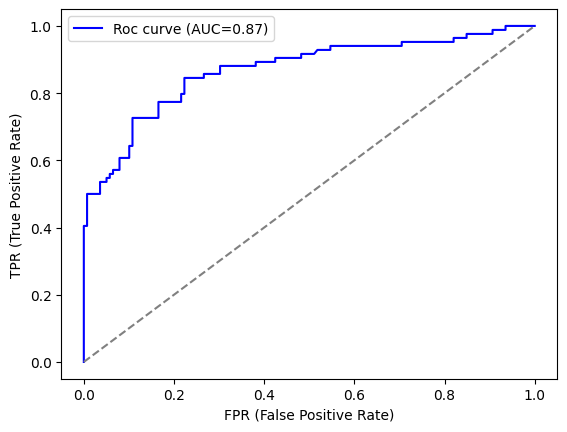

In [33]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'Roc curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

### 회귀모델 평가

In [35]:
# 샘플 데이터 
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [36]:
from sklearn.metrics import mean_squared_error            # MSE (평균 제곱 오차 )
from sklearn.metrics import root_mean_squared_error       # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error           # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error        # MSLE (평균 제곱 로그 오차 )
from sklearn.metrics import root_mean_squared_log_error   # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                      # R^2 결정계수

print(mean_squared_error(y_true, y_pred))
print(root_mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_log_error(y_true, y_pred))
print(root_mean_squared_log_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

1.125
1.0606601717798212
0.75
0.058006407800631835
0.2408451946803835
0.8059299191374663
